In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap

In [3]:
bicycle = pd.read_csv('dataset/train.csv')
bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [4]:
#결측치 확인
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(bicycle.columns):
        missing_values = sum(bicycle[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(bicycle.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

In [5]:
check_missing_col(bicycle)

결측치가 존재하지 않습니다


In [6]:
#날짜 문자열 -> 숫자로 변환
def seperate_datetime(df):
    year = []
    month = []
    day = []
    
    for date in df.date_time:
        year_point, month_point, day_point = date.split('-')
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

In [7]:
year, month, day = seperate_datetime(bicycle)

bicycle['year'] = year
bicycle['month'] = month
bicycle['day'] = day

bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


In [8]:
data_description = bicycle.describe()
data_description

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022,2019.000000,5.000000,15.670330
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774,0.817996,0.813489,8.774195
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000,2018.000000,4.000000,1.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000,2018.000000,4.000000,8.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000,2019.000000,5.000000,16.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000,2020.000000,6.000000,23.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000,2020.000000,6.000000,31.000000


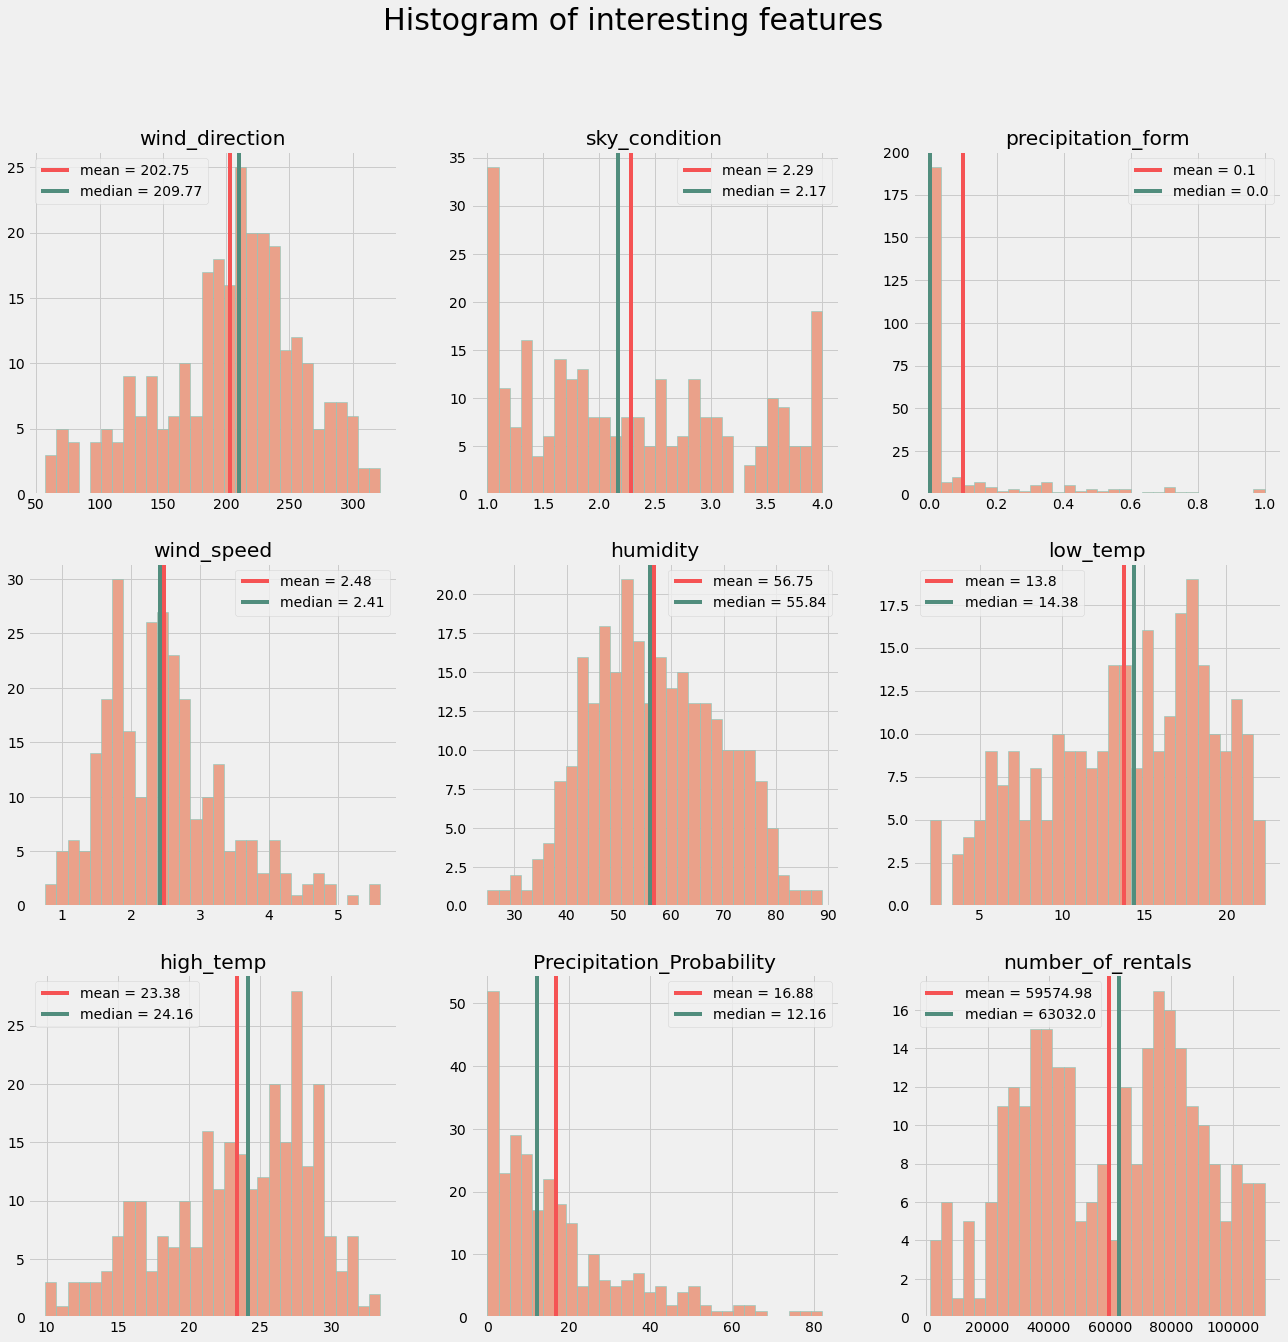

In [11]:
coloumns = ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed', 'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability', 'number_of_rentals']

plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(3, 3, figsize = (20, 20))
fig.suptitle('Histogram of interesting features', fontsize=30)

column_idx = 0
for i in range(3):
    for j in range(3):
        ax[i][j].hist(bicycle[coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(coloumns[column_idx])
        ax[i][j].axvline(data_description[coloumns[column_idx]]['mean'], c='#f55354',
                         label = f"mean = {round(data_description[coloumns[column_idx]]['mean'], 2)}") #평균(빨강색)
        ax[i][j].axvline(data_description[coloumns[column_idx]]['50%'], c='#518d7d',
                         label = f"median = {round(data_description[coloumns[column_idx]]['50%'], 2)}") #중앙(초록)
        ax[i][j].legend()
        column_idx += 1

In [ ]:
#직관적으로 보았을 때 wind_direction, sky_condition, precipitaion, humidity, precipition이 상관관계가 존재하는 것 같다.
#내 생각에는 온도도 큰 영향을 미칠 것 같은데, low_temp와 high_temp의 상관관계는 잘 모르겠다..
#wind_direciton: 200-250
#sky_conditioon: 1(맑음)
#wind_speed: 2-3
#humidity: 40-60
#precipitation_probability: 20% 이하

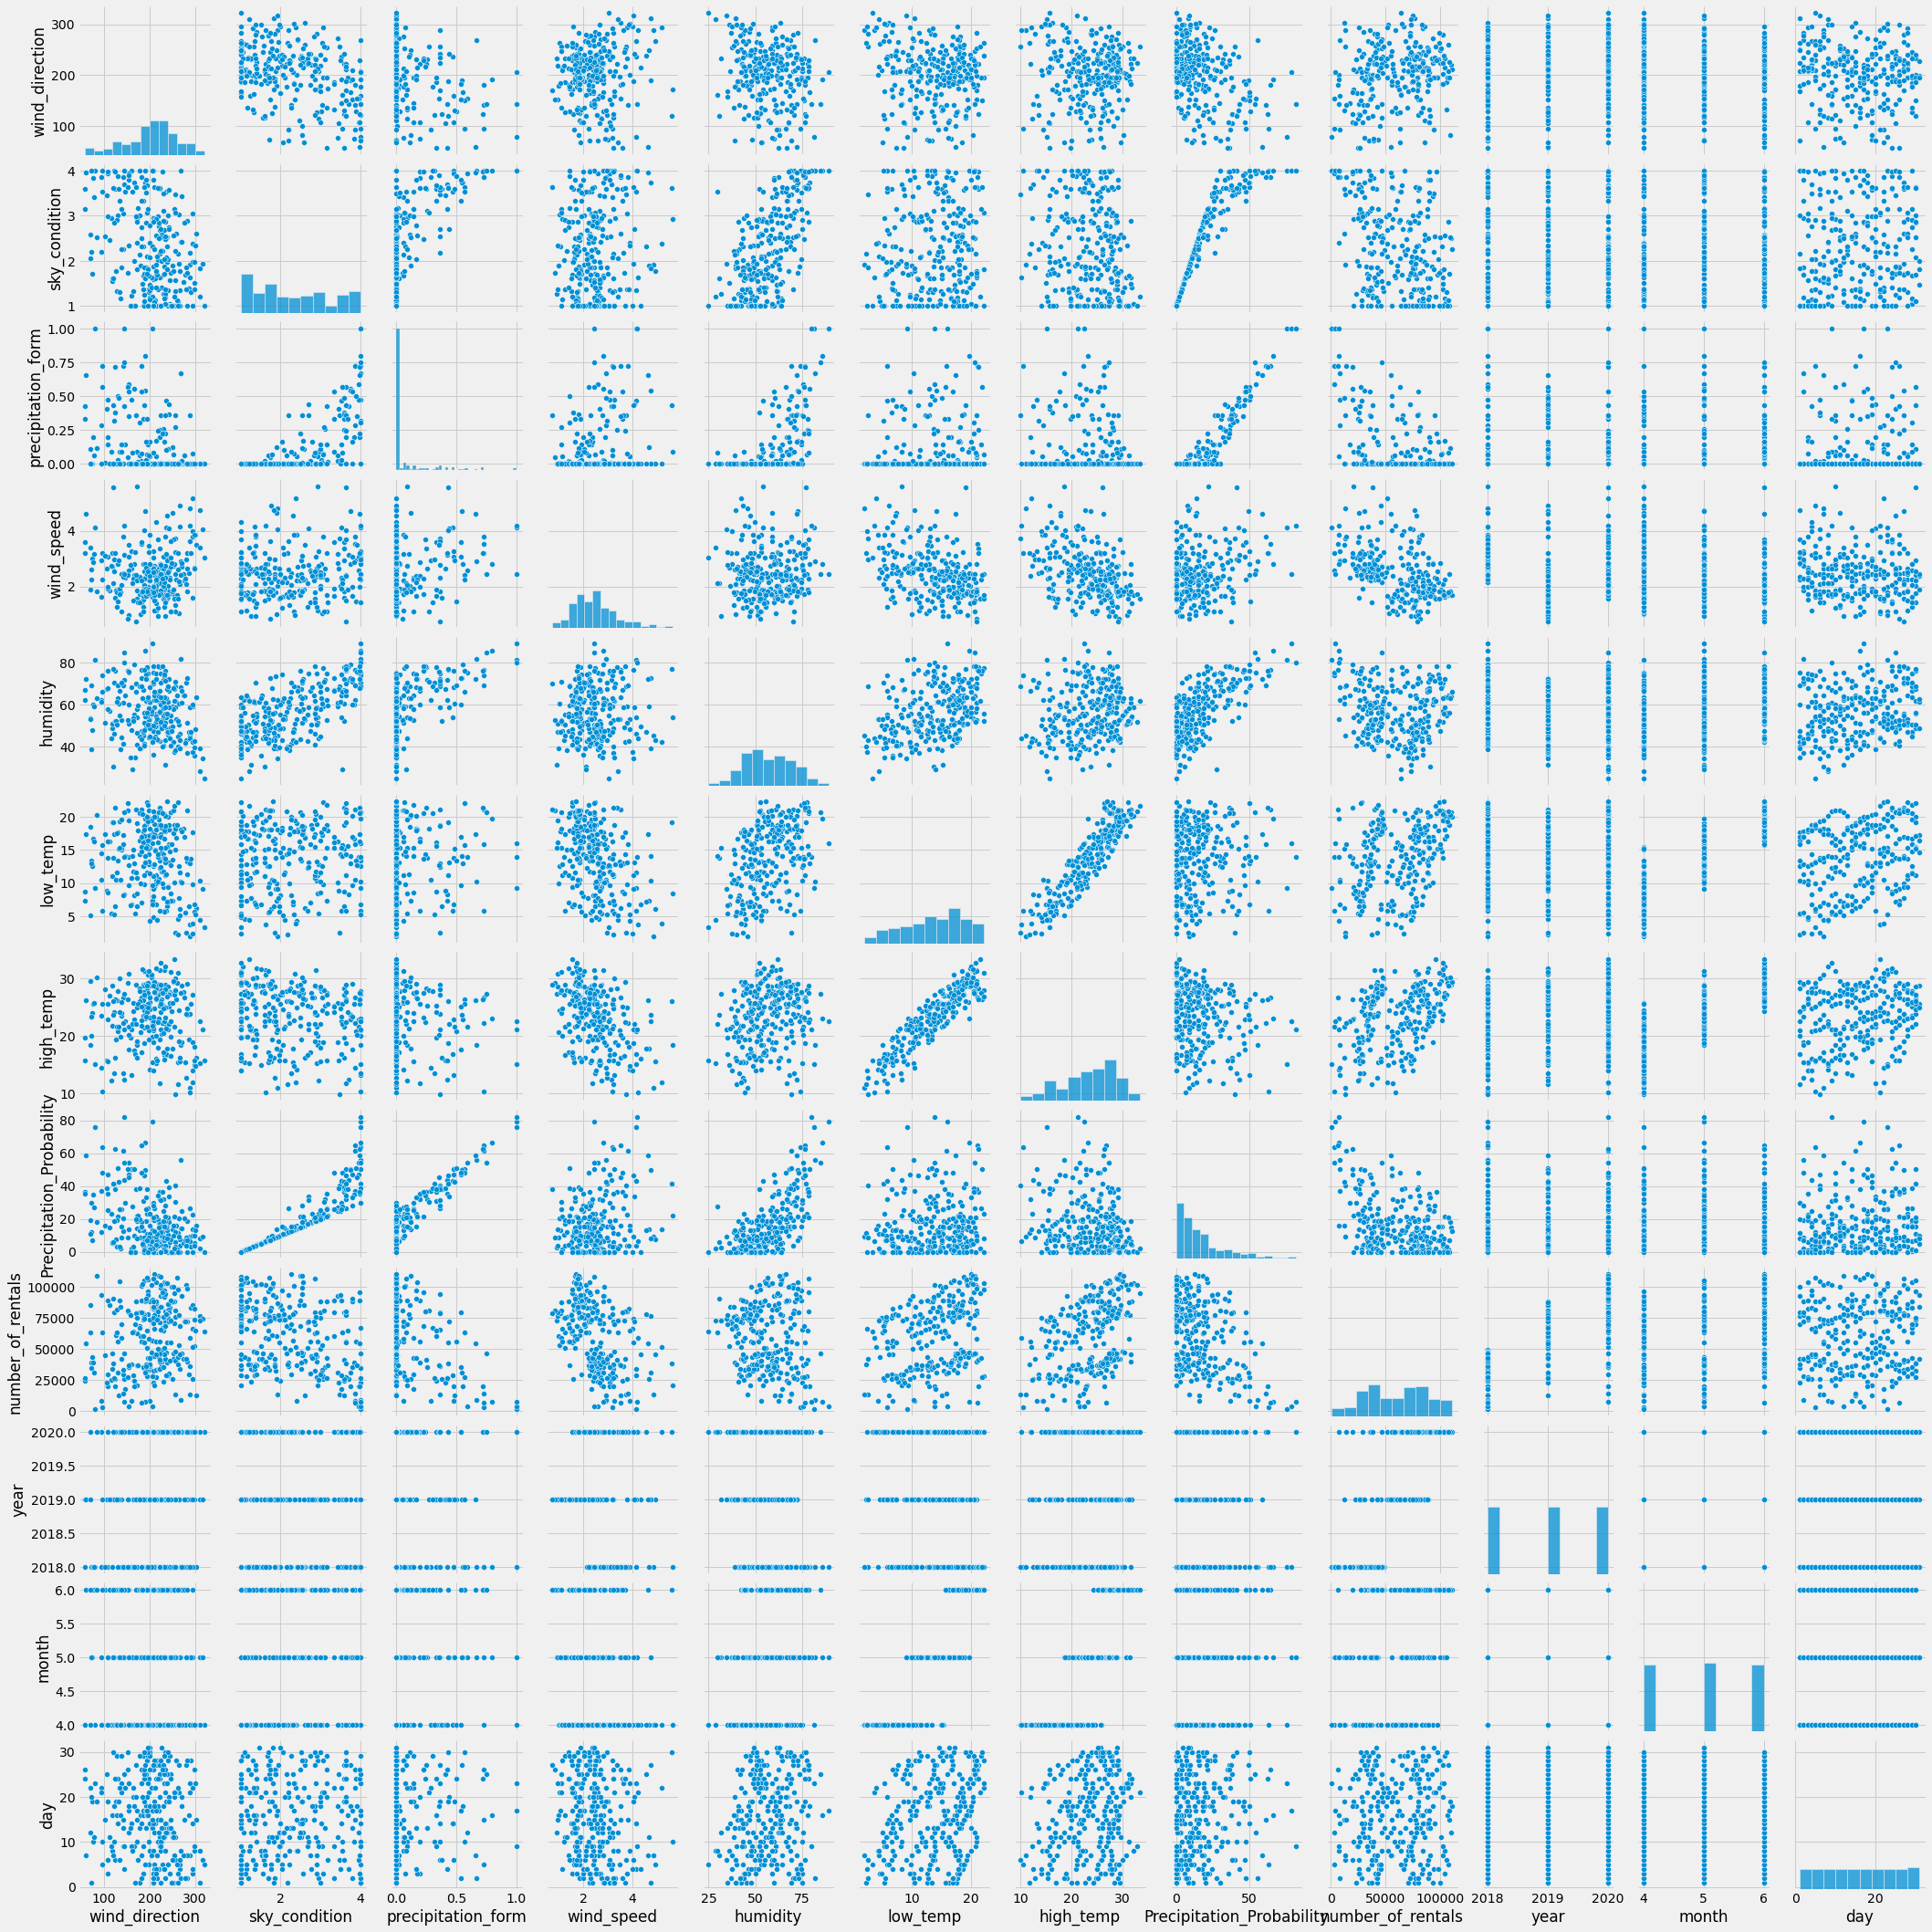

In [10]:
sns.pairplot(bicycle)

In [ ]:
#low_temp와 high_temp말고 완벽한 상관관계를 보이는 것이 없어보인다.

<Figure size 1440x720 with 0 Axes>

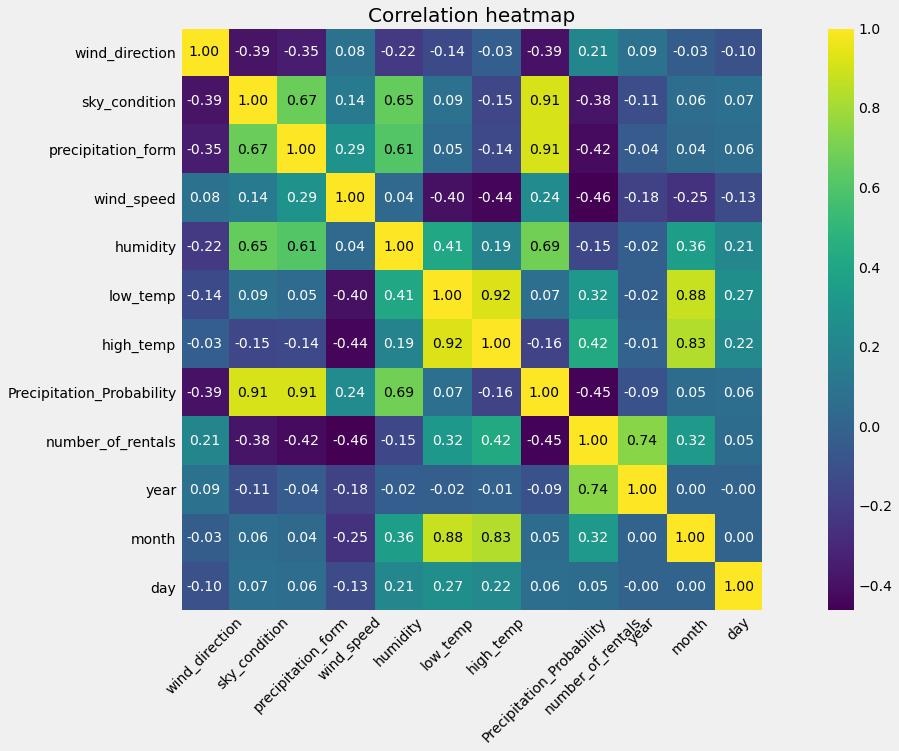

In [11]:
bicycle_number = bicycle.select_dtypes(np.number) 
cm = np.corrcoef(bicycle_number.values.T)
plt.figure(figsize=(20,10))
hm = heatmap(cm, 
             figsize =(20,10),
             row_names = bicycle_number.columns,
             column_names = bicycle_number.columns
            )
plt.title('Correlation heatmap', fontsize=20)
plt.show()

In [ ]:
#풍향, 최저기온, 최고기온, 년도, 월, 일이 상관관계가 존재한다.

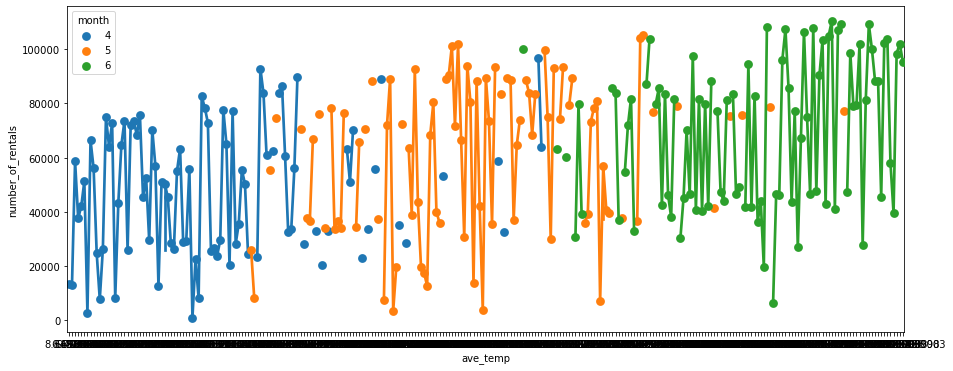

In [9]:
#온도(최저, 최고 기온)

bicycle['ave_temp'] = (bicycle['low_temp'] + bicycle['high_temp'])/2.0

fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(data=bicycle, x='ave_temp',y='number_of_rentals', hue='month',ax=ax, ci=50)
plt.show()

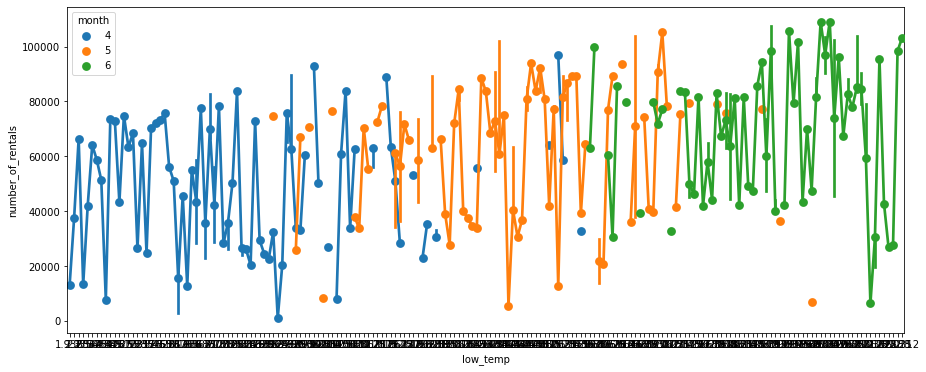

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(data=bicycle, x='low_temp',y='number_of_rentals', hue='month',ax=ax, ci=50)
plt.show()

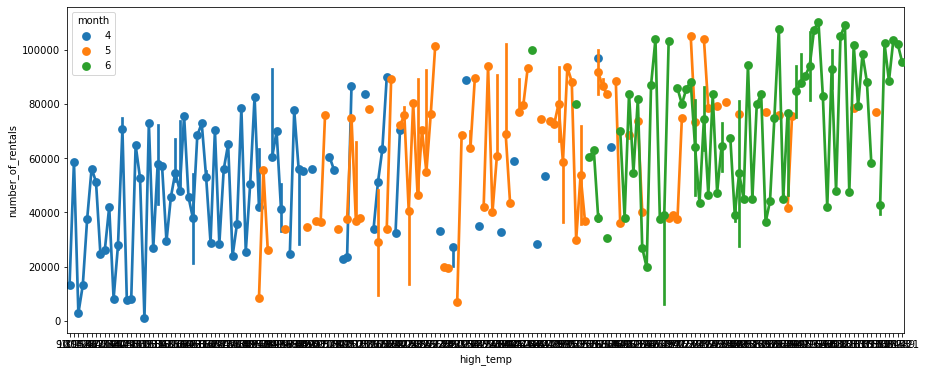

In [11]:
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(data=bicycle, x='high_temp',y='number_of_rentals', hue='month',ax=ax, ci=50)
plt.show()

In [ ]:
#전반적으로 평균, 최저, 최고 온도에 따른 따릉이 대여량은 비슷해보인다.
#평균 온도만 빼고 삭제해볼까? -> 정확도 떨어짐

In [ ]:
#일교차가 높을 때, 덥고 습할 때, 춥고 바람 불 때 
#따릉이 사용량이 감소할 것이라는 가정

In [ ]:
#직관적으로 온도, 습도, 불쾌지수, 체감 온도, 추위가 중요할 것이라고 생각

In [13]:
bicycle['temp_diff'] = bicycle['high_temp'] - bicycle['low_temp']
bicycle['sweat'] = bicycle['high_temp'] * bicycle['humidity']
bicycle['cold'] = bicycle['low_temp'] * bicycle['wind_speed']
#추가시 정확도 0.69 -> 0.59로 상승

In [21]:
#불쾌지수 추가
bicycle['discomfort_index'] = 1.8 * bicycle['ave_temp'] - 0.55 * (1-bicycle['humidity']) * (1.8*bicycle['ave_temp']-26)+32
#추가시 정확도 0.59 -> 0.57로 상승

In [31]:
#체감온도
# bicycle['sensible temperature'] = 13.12 + 0.6215*bicycle['ave_temp'] -11.37*pow(bicycle['wind_speed'],0.16) + 0.3965 * pow(bicycle['wind_speed'],0.16)* bicycle['ave_temp']
#체감온도 추가시 0.578 -> 0.583로 하락 ㅜ

In [12]:
#상관관계를 확인한 결과 number_of_rentals과 가장 상관관계가 높은 컬럼은 year이다.
#이것은 시간이 지남으로 사용자가 증가한다고 해석할 수 있다.

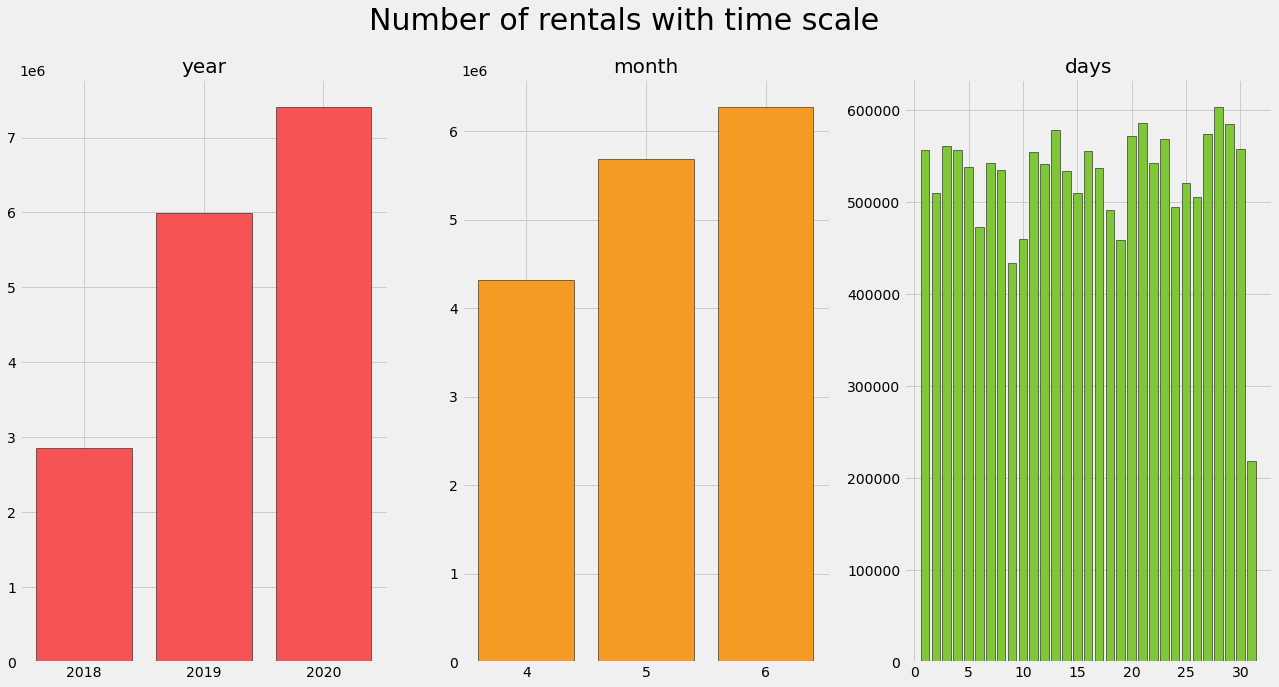

In [13]:
#년도, 월, 날짜별 따릉이 대여량을 비교해보자.
year_rentals = bicycle.groupby('year').sum()['number_of_rentals']
month_rentals = bicycle.groupby('month').sum()['number_of_rentals']
day_rentals = bicycle.groupby('day').sum()['number_of_rentals']

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Number of rentals with time scale', fontsize=30)

ax[0].bar(x=['2018', '2019', '2020'], height=year_rentals, color='#f55354', edgecolor='black')
ax[0].set_title('year', fontsize = 20)

ax[1].bar(x = ['4', '5', '6'], height=month_rentals, color='#f59b25', edgecolor='black')
ax[1].set_title('month', fontsize = 20)

ax[2].bar(x=day_rentals.index.to_list(), height= day_rentals, color='#7fc638', edgecolor='black')
ax[2].set_title('days', fontsize = 20)

plt.show()

In [14]:
#년도가 증가함에 따라 따릉이 대여량이 증가하는 것을 알 수 있다. -> 시간이 지남에 따라 따릉이 사용자량 증가
#월별 따릉이 대여량을 확인한 결과 6월이 될 수록 대여량이 증가하는 것을 알 수 있다. -> 날씨가 푹해짐에 따라 따릉이 사용량 증가
#날짜별 따릉이 대여량을 확인한 결과 무작위적으로 분포된 것을 알 수 있다. -> 큰 관계가 없는 것 같다.

#요일을 추가하여 확인해보도록 하자
week_day = pd.to_datetime(bicycle['date_time']).dt.day_name()
bicycle['week_day'] = week_day

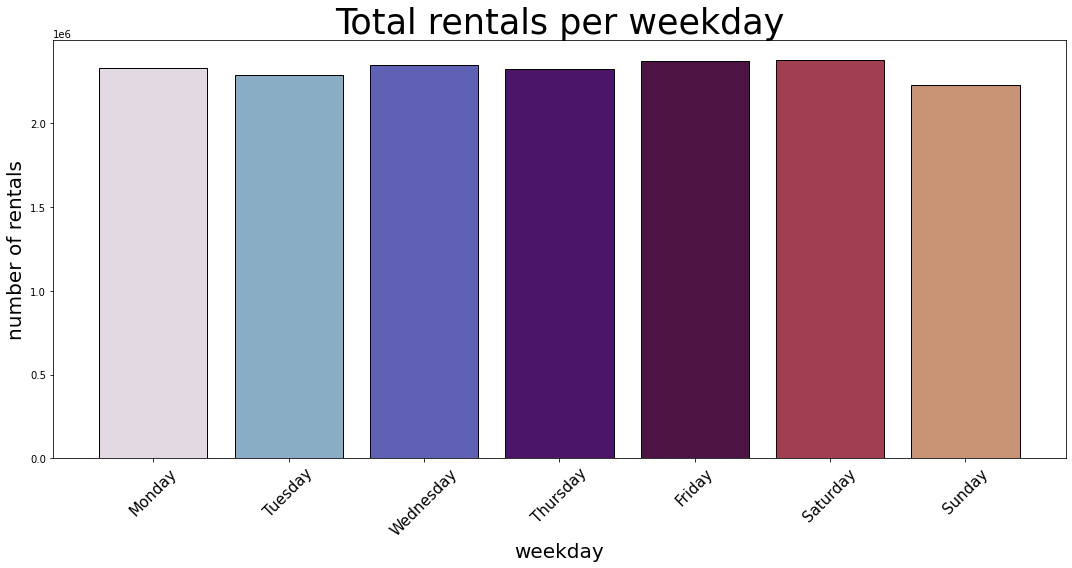

In [15]:
#요일별 관계를 확인해보자
day_table = bicycle.groupby('week_day').sum()
day_table = day_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 8))
color_map = plt.get_cmap('twilight')
color_list = [color_map.colors[i] for i in range(0, 512, 72)]
plt.bar(day_table.index, day_table.number_of_rentals, edgecolor='black', color=color_list)
plt.xticks(rotation=45, fontsize=15)
plt.title('Total rentals per weekday', fontsize=35)
plt.xlabel('weekday', fontsize=20)
plt.ylabel('number of rentals', fontsize=20)
plt.tight_layout()
plt.show()

In [16]:
#요일 또한 별 관계가 없어보인다.

In [17]:
#강수확률, 하늘 상태 산점도을 확인해보자.

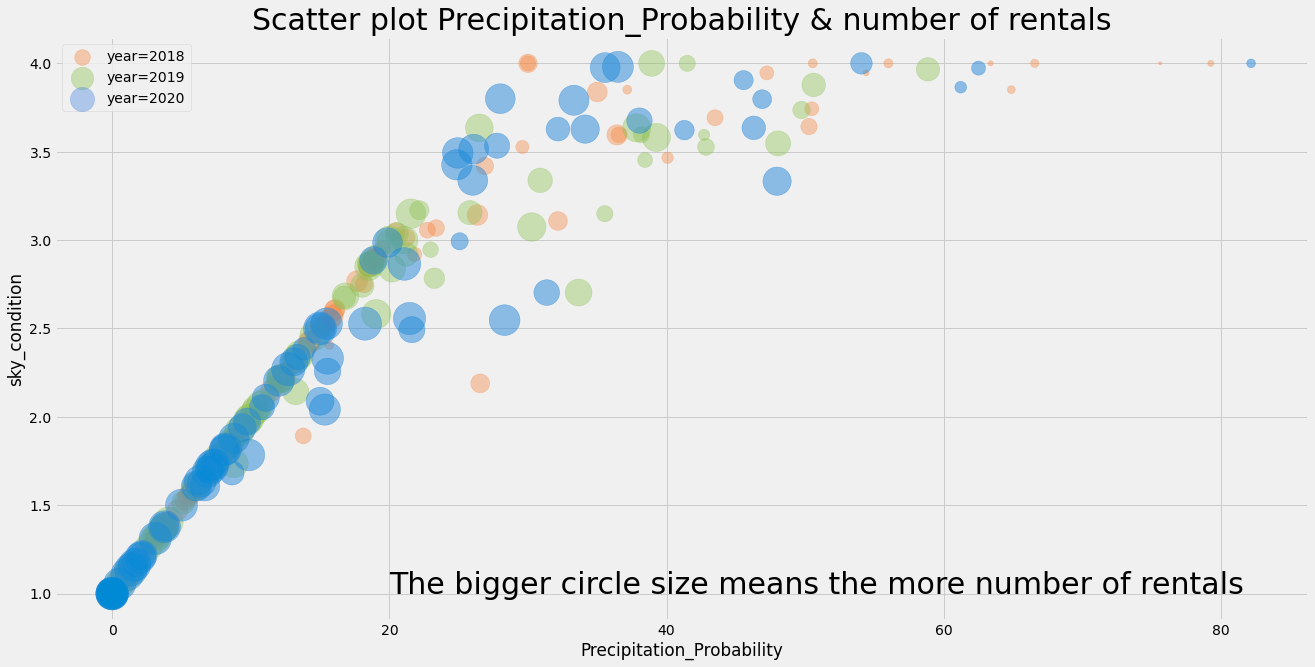

In [17]:
years = [2018, 2019, 2020]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20, 10))
for year, color in zip(years, colors):
    
    precipitation_prb = bicycle[bicycle['year'] == year].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
    rentals = bicycle[bicycle['year'] == year].sort_values(by='Precipitation_Probability')['number_of_rentals']
    sky_condition = bicycle[bicycle['year'] == year].sort_values(by='Precipitation_Probability')['sky_condition']
    
    plt.scatter(precipitation_prb, sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'year={year}')


plt.scatter(precipitation_prb, sky_condition,s=rentals/100, alpha=0.2)
plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize= 30)
plt.legend()
plt.show()

In [20]:
#강수 확률과 하늘 상태 값은 비례하다 -> 강수확률이 낮으면 맑아진다(당연한것)
#확실히 강수확률이 높으면 대여량이 줄어든 것을 볼 수 있다.
#sky_condition과 precipitation_probabilty는 높은 상관관계를 보여 sky_condition을 삭제
#하지만 추가한 것의 예측률이 높아 다시 추가

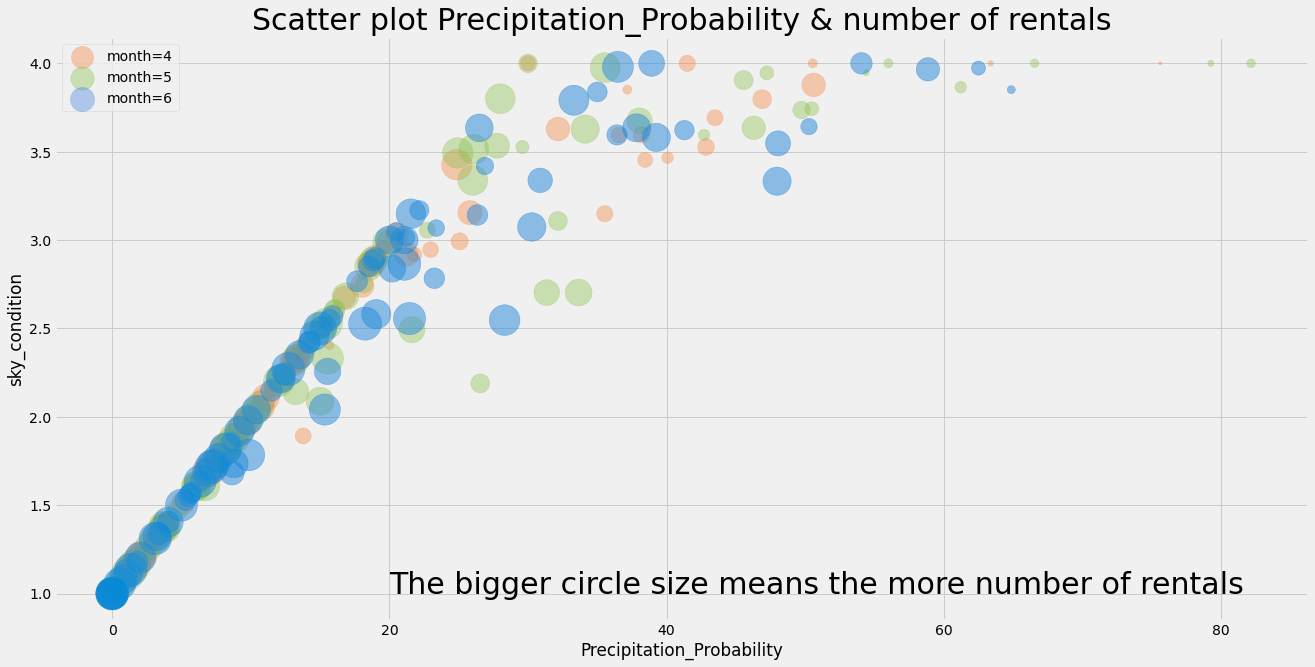

In [18]:
#월별로 비교하기
monthes = [4, 5, 6]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20, 10))

for month, color in zip(monthes, colors):
    
    precipitation_prb = bicycle[bicycle['month'] == month].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
    rentals = bicycle[bicycle['month'] == month].sort_values(by='Precipitation_Probability')['number_of_rentals']
    sky_condition = bicycle[bicycle['month'] == month].sort_values(by='Precipitation_Probability')['sky_condition']
    
    plt.scatter(precipitation_prb, sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'month={month}')


plt.scatter(precipitation_prb, sky_condition,s=rentals/100, alpha=0.2)
plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize= 30)
plt.legend()
plt.show()

In [ ]:
#위에서 히스토그램을 보며 직관적으로 예상한 것과 비슷한 그림이 보인다.
#대부분 강수량 20%이하 일때 따릉이의 대여수가 많은 것을 알 수 있다.
#강수량 20을 기준으로 그룹화를 진행

#6월에 따릉이양이 많은 것을 또 한번 확인할 수 있다.
#그룹화를 진행했을 때 정확도: 0.612
#진행하지 않았을 때 정확도: 0.618
#큰 차이는 없지만 미세하게 그룹화를 진행했을 때의 정확도가 높았다.

In [15]:
def group_Precipitation_Probability(df):
    bicycle.loc[bicycle['Precipitation_Probability'] <20, 'Precipitation_Probability'] = 0
    bicycle.loc[bicycle['Precipitation_Probability'] >=20, 'Precipitation_Probability'] = 1
    
group_Precipitation_Probability(bicycle)

In [22]:
#필요없는 column을 삭제한다.

In [32]:
X_train = bicycle.drop(['date_time', 'wind_direction','number_of_rentals', 'day', 'week_day'], axis = 1)
y_train = bicycle.number_of_rentals

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
y_hat = lr.predict(X) # y 예측
nmae = np.mean(abs(y_hat - y) / y) # nmae 계산

print(nmae)

0.32870263040836806


In [93]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
model.fit(X_train, y_train)

#예측률:0.905(0으로 가까울 수록 좋은 것)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
#예측률: 0.869

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 0, n_estimators = 100)
rf.fit(X_train,y_train)
#예측률: 0.642(sky_condition 삭제)
#예측률: 0.612(sky_condition 추가)

RandomForestRegressor(random_state=0)

In [35]:
#제출

#01) 데이터 읽어오기
test = pd.read_csv('dataset/test.csv') 
submission  = pd.read_csv('dataset/sample_submission.csv')

#02) 결측치 확인하기
check_missing_col(test)
group_Precipitation_Probability(test)

#03) 날짜 문자열 -> 숫자로 변경하기
year, month, day = seperate_datetime(test)
test['year'] = year 
test['month'] = month
test['ave_temp'] = (test['high_temp']+test['low_temp']) / 2.0
test['temp_diff'] = test['high_temp'] - test['low_temp']
test['sweat'] = test['high_temp'] * test['humidity']
test['cold'] = test['low_temp'] * test['wind_speed']
test['discomfort_index'] = 1.8 * test['ave_temp'] - 0.55 * (1-test['humidity']) * (1.8*test['ave_temp']-26)+32

#04) 훈련, 예측하기
test_X = test.drop(['date_time', 'wind_direction'], axis = 1)
test_y = rf.predict(test_X)

# submission dataFrame 완성
submission['number_of_rentals'] = test_y
# 제출 파일 생성
submission.to_csv('sample_submission.csv', index= False)

결측치가 존재하지 않습니다
